<a href="https://colab.research.google.com/github/AnushkaMazumdar2/Machine_Learning/blob/main/2348505_Image_Classification_and_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Image Filtering**

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

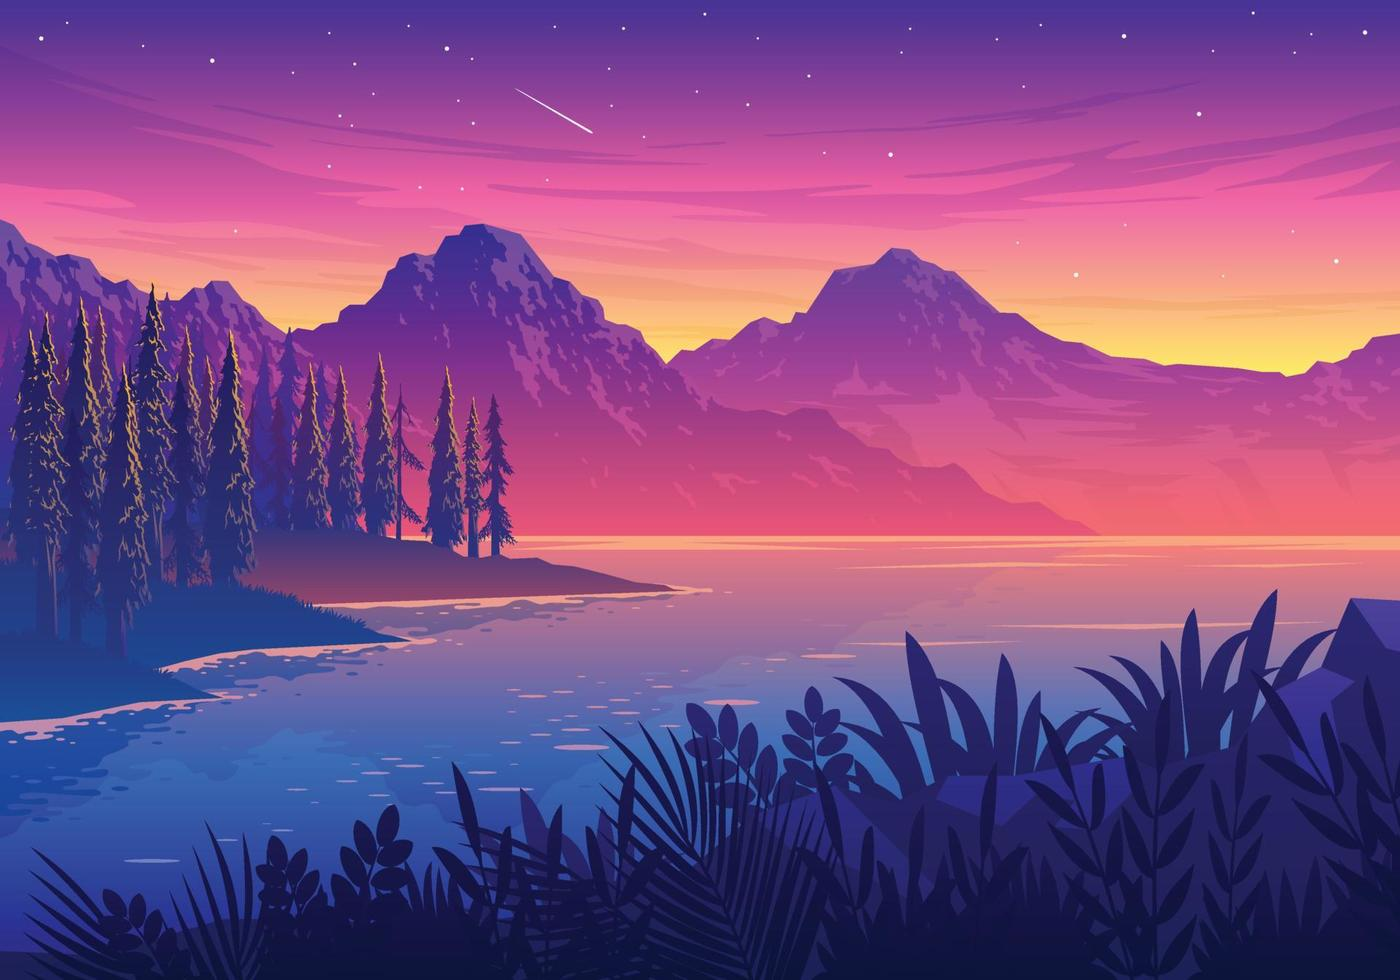

In [ ]:
img = cv2.imread('img1.jpg')
cv2_imshow(img)

In [ ]:
mean_kernel = np.ones((5,5),np.float32)/25
mean_filter = cv2.filter2D(img,-1,mean_kernel)
median_filter = cv2.medianBlur(img,5)
gaussian_filter = cv2.GaussianBlur(img,(5,5),0)
bilateral_filter = cv2.bilateralFilter(img,9,75,75)
kernel = np.array([[-1,-1,-1],[-1,9,-1],[-1,-1,-1]])
sharpening_filter = cv2.filter2D(img,-1,kernel)
laplacian_filter = cv2.Laplacian(img,cv2.CV_64F)
sobel_filter = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)

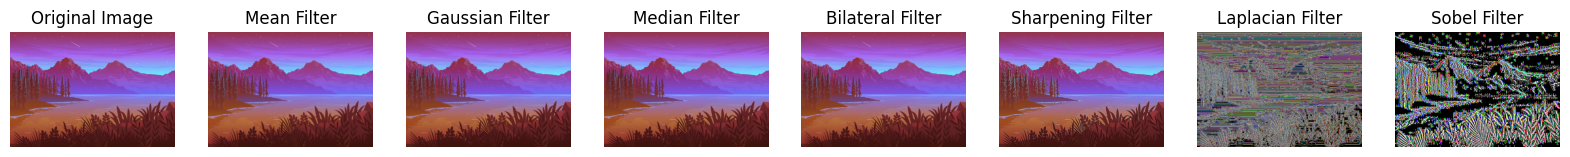

In [ ]:
# Display Results

titles = ['Original Image','Mean Filter', 'Gaussian Filter', 'Median Filter', 'Bilateral Filter','Sharpening Filter','Laplacian Filter', 'Sobel Filter']
images = [img, mean_filter, gaussian_filter, median_filter, bilateral_filter,sharpening_filter,laplacian_filter,sobel_filter]

plt.figure(figsize=(20,15))
for i in range(len(titles)):
    plt.subplot(1,8,i+1),plt.imshow(images[i],'gray'),plt.axis("off")
    plt.title(titles[i])

# **Image Classification**

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import joblib
from google.colab.patches import cv2_imshow
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.svm import SVC
from keras.datasets import mnist
from sklearn.naive_bayes import MultinomialNB
from PIL import Image

In [2]:
# Importing the mnist dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# Normalize the images
x_train = x_train.astype("float32")/255.0
x_test = x_test.astype("float32")/255.0
# Reshape the data to have a single channel
x_train = x_train.reshape(x_train.shape[0],28,28,1)
x_test = x_test.reshape(x_test.shape[0],28,28,1)

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
len(x_train)

60000

In [4]:
len(x_test)

10000

# **Method 1: MNist Data without any pre-processing**

In [ ]:
# Fit the model using the reshaped data
model = SVC()
# Reshape the training and test data to 2D before fitting the model
nsamples, nx, ny, nz = x_train.shape
x_train_2d = x_train.reshape((nsamples,nx*ny*nz))
nsamples, nx, ny, nz = x_test.shape
x_test_2d = x_test.reshape((nsamples,nx*ny*nz))
model.fit(x_train_2d, y_train)

# Predict using the reshaped test data
y_pred = model.predict(x_test_2d)

# Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9792


In [ ]:
modelnb = MultinomialNB()
modelnb.fit(x_train_2d, y_train)
y_pred = modelnb.predict(x_test_2d)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8357


# **Method 2: Apply Mean and Median Filter and SVC Model**

In [ ]:
def apply_filter(images):
  mean_filtered = []
  gaussian_filtered = []
  median_filtered = []
  sobel_filtered = []
  laplacian_filtered = []
  for img in images:
    img = img.squeeze()
    mean_kernel = np.ones((5,5),np.float32)/25
    mean_filtered.append(cv2.filter2D(img,-1,mean_kernel))
    gaussian_filtered.append(cv2.GaussianBlur(img,(5,5),0))
    median_filtered.append(cv2.medianBlur(img,5))
    sobel_filtered.append(cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5))
    laplacian_filtered.append(cv2.Laplacian(img.astype(np.float32),cv2.CV_32F))
  return mean_filtered, gaussian_filtered, median_filtered, sobel_filtered, laplacian_filtered

In [ ]:
mean_filtered, gaussian_filtered, median_filtered, sobel_filtered, laplacian_filtered = apply_filter(x_train)
mean_filteredx, gaussian_filteredx, median_filteredx, sobel_filteredx, laplacian_filteredx = apply_filter(x_test)

**Mean Filter**

In [ ]:
mean_filtered_reshaped = np.array(mean_filtered).reshape(len(mean_filtered), -1)
mean_filteredx_reshaped = np.array(mean_filteredx).reshape(len(mean_filteredx), -1)
model_mean = SVC()
model_mean.fit(mean_filtered_reshaped, y_train)
y_pred = model_mean.predict(mean_filteredx_reshaped)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9745


**Median Filter**

In [ ]:
median_filtered_reshaped = np.array(median_filtered).reshape(len(median_filtered), -1)
median_filteredx_reshaped = np.array(median_filteredx).reshape(len(median_filteredx), -1)
model_median = SVC()
y_pred = model_median.predict(median_filteredx_reshaped)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9459


**Gaussian Filter**

In [ ]:
gaussian_filtered_reshaped = np.array(gaussian_filtered).reshape(len(gaussian_filtered), -1)
gaussian_filteredx_reshaped = np.array(gaussian_filteredx).reshape(len(gaussian_filteredx), -1)
model_gaussian = SVC()
model_gaussian.fit(gaussian_filtered_reshaped, y_train)
y_pred = model_gaussian.predict(gaussian_filteredx_reshaped)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9785


# **Method 3: Apply Linear and Non-Linear Filter and Naive Bayes**

**Mean Filter**

In [ ]:
modelnb_mean = MultinomialNB()
modelnb_mean.fit(mean_filtered_reshaped, y_train)
y_pred = modelnb_mean.predict(mean_filteredx_reshaped)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7872


**Median Filter**

In [ ]:
modelnb_median = MultinomialNB()
modelnb_median.fit(median_filtered_reshaped, y_train)
y_pred = modelnb_median.predict(median_filteredx_reshaped)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8008


**Gaussian Filter**

Accuracy: 0.8074
              precision    recall  f1-score   support

           0       0.91      0.92      0.91       980
           1       0.87      0.93      0.90      1135
           2       0.89      0.80      0.84      1032
           3       0.77      0.83      0.80      1010
           4       0.81      0.70      0.75       982
           5       0.85      0.62      0.72       892
           6       0.86      0.88      0.87       958
           7       0.92      0.81      0.86      1028
           8       0.62      0.75      0.68       974
           9       0.67      0.82      0.73      1009

    accuracy                           0.81     10000
   macro avg       0.82      0.80      0.81     10000
weighted avg       0.82      0.81      0.81     10000



<Axes: >

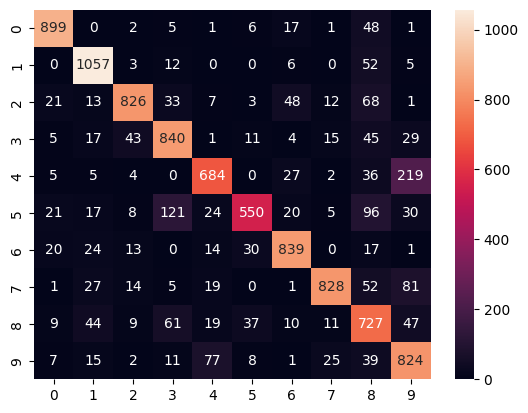

In [ ]:
modelnb_gaussian = MultinomialNB()
modelnb_gaussian.fit(gaussian_filtered_reshaped, y_train)
y_pred = modelnb_gaussian.predict(gaussian_filteredx_reshaped)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True,fmt='d')

# Method 4: Creating my own Data and Testing on it

In [5]:
# Fit the model using the reshaped data
model = SVC()
# Reshape the training and test data to 2D before fitting the model
nsamples, nx, ny, nz = x_train.shape
x_train_2d = x_train.reshape((nsamples,nx*ny*nz))
nsamples, nx, ny, nz = x_test.shape
x_test_2d = x_test.reshape((nsamples,nx*ny*nz))
model.fit(x_train_2d, y_train)

# Predict using the reshaped test data
y_pred = model.predict(x_test_2d)

# Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9792


In [8]:
# Assuming `svm_model` is your trained SVM model
joblib_file = "svm_model.pkl"
joblib.dump(model, joblib_file)
print(f'Model saved as {joblib_file}')

Model saved as svm_model.pkl


In [9]:
# Load the trained SVM model
loaded_model = joblib.load(joblib_file)
print('Model loaded successfully')

Model loaded successfully


In [11]:
# Preprocess your own handwritten digit image
def preprocess_image(image_path):
    img = Image.open(image_path).convert('L')  # Convert to grayscale
    img = img.resize((28, 28), Image.ANTIALIAS)  # Resize to 28x28 pixels
    img_array = np.array(img)  # Convert to a numpy array
    img_array = img_array.flatten()  # Flatten the array to 1D (784,)
    img_array = img_array / 255.0  # Normalize the pixel values (0-255 to 0-1)
    return img_array

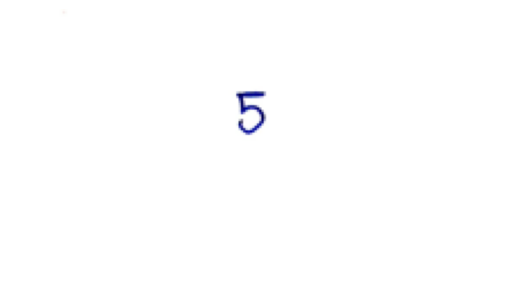

In [21]:
image_path = '5.png'
img = Image.open(image_path)
plt.imshow(img, cmap='gray')
plt.axis('off')  # Hide the axis
plt.show()

In [22]:
processed_image = preprocess_image(image_path)
predicted_digit = loaded_model.predict([processed_image])
print(f'The predicted digit is: {predicted_digit[0]}')

The predicted digit is: 5


<ipython-input-11-207b6160a2a8>:4: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img = img.resize((28, 28), Image.ANTIALIAS)  # Resize to 28x28 pixels


# **Clustering**

In [17]:
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from scipy.stats import mode
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
mnist = fetch_openml('mnist_784',version=1)
x = mnist.data
y = mnist.target.astype(int)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [3]:
x.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)

pca = PCA(n_components=50)
X_pca = pca.fit_transform(X_scaled)

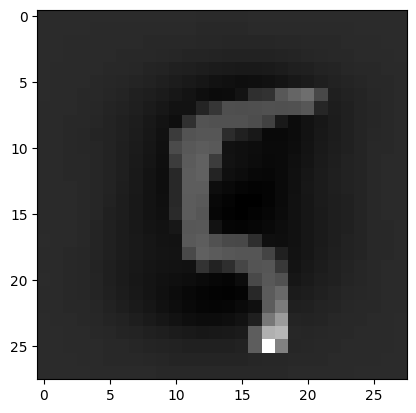

In [10]:
# Printing a random digit from MNist

plt.imshow(X_scaled[100].reshape(28,28),cmap='gray')

In [11]:
# Apply K-Means Clustering

n_clusters = 10
kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(X_pca)
clusters = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [12]:
# Map each cluster label to the most frequent true label

labels = np.zeros_like(clusters)
for i in range(n_clusters):
    mask = (clusters == i)
    labels[mask] = mode(y[mask])[0]

In [40]:
# Calculate Accuracy

accuracy = accuracy_score(y, labels)
print("Accuracy", accuracy)

Accuracy 0.5264428571428571


<Axes: >

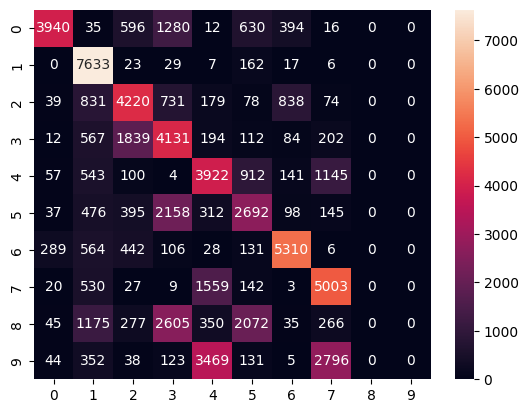

In [18]:
cm = confusion_matrix(y, labels)
sns.heatmap(cm,annot=True,fmt='d')

In [26]:
# Visualize the clusters

def plot_digits(data,clusters,num_images):
  fig,axes = plt.subplots(1,num_images,figsize=(10,4),subplot_kw={'xticks':[],'yticks':[]})
  for i in range(num_images):
    for j in range(n_clusters):
      ax = axes[i]
      ax.imshow(data[i].reshape(28,28),cmap='gray')
      ax.set_title(f'Cluster {clusters[i]}')
  plt.show()

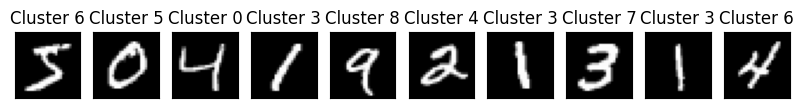

In [36]:
plot_digits(x.values,clusters,10)

In [35]:
misclassifications = {}
for i in range(n_clusters):
    mask = (clusters == i)
    misclassifications[i] = np.sum(y[mask] != labels[mask])
for cluster,wrong_count in misclassifications.items():
  print(f'Cluster {cluster}: {wrong_count} misclassifications')

Cluster 0: 1085 misclassifications
Cluster 1: 1615 misclassifications
Cluster 2: 3571 misclassifications
Cluster 3: 5073 misclassifications
Cluster 4: 1914 misclassifications
Cluster 5: 543 misclassifications
Cluster 6: 4370 misclassifications
Cluster 7: 7045 misclassifications
Cluster 8: 6110 misclassifications
Cluster 9: 1823 misclassifications
